# Min Cost Max Flow Example using Networkx

Below is an example of solving a min cost - max flow problem using networkx. The Example below mimics the classic transportation problem where goods are shipped from suppliers to demanders.

Here we assume a Bipartite Structure with an added source (Node 1) and sink (Node 7). Weights and capacities are added as edge attributes representing distance penalty (cost per unit flow)and demand of goods (unit flow of goods), respectively. 

In this example, Node 2 has 50 units of goods and Node 3 has 50 units of goods. These goods must be transported to Node 3 (which can accept 40 units) and Node 4 (which can accept 60 units). The cost (or penalty) incurred for each unit of goods is 0 from node 2 to node 4 and 0 from node 3 to node 5. However, a penalty of 1 is applied for transporting goods from node 2 to node 5 and node 3 to node 4. 

What is the min cost solution for transporting these goods???

## Steps

1. Construct the Graph that correctly models this problem. Setting up the graph with the correct connections, capacities, and weights is key here!
2. Use built-in solver from networkx: max_flow_min_cost(...)

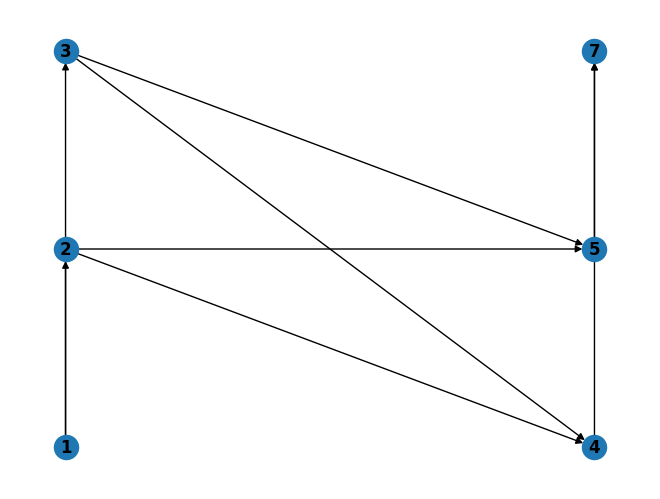

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.flow import maximum_flow

'''
Construct the directed bipartite graph with added source and sink.
'''

G = nx.DiGraph()
G.add_edges_from(
    [
        (1, 2, {"capacity": 50, "weight": 0}),
        (1, 3, {"capacity": 50, "weight": 0}),
        (2, 4, {"capacity": 40, "weight": 0}),
        (2, 5, {"capacity": 60, "weight": 1}),
        (3, 4, {"capacity": 40,"weight": 1}),
        (3, 5, {"capacity": 60, "weight": 0}),
        (4, 7, {"capacity": 40,"weight": 0}),
        (5, 7, {"capacity": 60, "weight": 0}),
    ]
)

'''
Draw resulting graph using bipartite positioning
'''

pos = nx.bipartite_layout(G, [1,2,3], align='vertical', scale=1, center=None)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')
plt.show()



#Max Flow and Min Cost

Great! The graph has been drawn and the structure correctly reflects the problem at hand! Lets check the min cost flow and the min cost!

The min cost flow is the flow of good through the network that results in the min cost.

The min cost is the total resulting cost.


In [2]:

mincostFlow = nx.max_flow_min_cost(G, 1, 7)
mincost = nx.cost_of_flow(G, mincostFlow)
print("The min cost max flow is ...")
print(mincostFlow) 
print("\n")
print("The min cost is ...")
print(mincost)
#10



maxFlow = maximum_flow(G, 1, 7)[1]
print("\nOne of the many potential max flows is ... ")
print(maxFlow)

print("\nThe cost of that max flow is ... ")
print(nx.cost_of_flow(G, maxFlow))





The min cost max flow is ...
{1: {2: 50, 3: 50}, 2: {4: 40, 5: 10}, 3: {4: 0, 5: 50}, 4: {7: 40}, 5: {7: 60}, 7: {}}


The min cost is ...
10

One of the many potential max flows is ... 
{1: {2: 50, 3: 50}, 2: {4: 0, 5: 50}, 3: {4: 40, 5: 10}, 4: {7: 40}, 5: {7: 60}, 7: {}}

The cost of that max flow is ... 
90


#Total Flow

The total flow from suppliers to all demanders (from sink to source) is computed as follows:

In [3]:

mincostFlowValue = sum((mincostFlow[u][7] for u in G.predecessors(7)))

print('Lets confirm the flow associated with the min cost is in fact a max flow ... ')
print(mincostFlowValue == nx.maximum_flow_value(G, 1, 7))
#True
print("\nWhat is the total flow (of goods)?")
print(nx.maximum_flow_value(G, 1, 7))

Lets confirm the flow associated with the min cost is in fact a max flow ... 
True

What is the total flow (of goods)?
100
